# Naive Bayes

## Introduction

We will start by working on the Iris dataset. Recall that Iris dataset contains iris species and sepal and petal measurements. We will quickly explore the dataset and jump into Naive Bayes.

In [1]:
from __future__ import print_function
import os
#Data Path has to be set as per the file location in your system
#data_path = ['..', 'data']
data_path = ['data']

## Question 1

* Load the Iris dataset.
* Take a quick look at the data types.
* Look at the skew values and decide if any transformations need to be applied. You can use skew value 0.75 as a threshold.
* Use `sns.pairplot` to plot the pairwise correlations and histograms. Use `hue="species"` as a keyword argument in order to see the distribution of species.

In [85]:
import pandas as pd
import numpy as np
#The filepath is dependent on the data_path set in the previous cell 
filepath = os.sep.join(data_path + ['Iris_Data.csv'])
data = pd.read_csv(filepath, sep=',', header=0)

In [86]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Notice that aside from the predictor variable, everything is float.

In [87]:
skew = pd.DataFrame(data.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
sepal_length,0.314911,False
sepal_width,0.334053,False
petal_length,-0.274464,False
petal_width,-0.104997,False


Fields are not too badly skewed.

C:\Users\olspa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


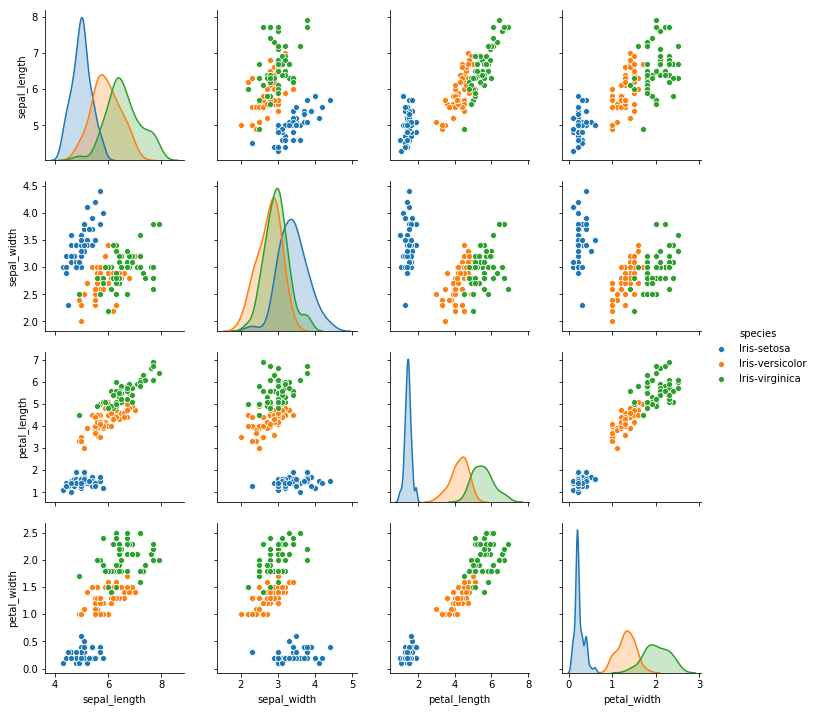

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(data, hue='species')

## Question 2

Let's now fit a Naive Bayes classifier to this data in order to predict "species".

* Pick the appropriate type of Naive Bayes given the nature of your dataset (data types of columns). Recall, choices are
    * GaussianNB
    * MultinomialNB
    * BernoulliNB
* Use `cross_val_score` to see how well your choice works.

In [89]:
# Since the features are continuous, the right choice is GaussianNB

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
X = data[data.columns[:-1]]
y = data.species

GNB = GaussianNB()
cv_N = 4
scores = cross_val_score(GNB, X, y, n_jobs=cv_N, cv=cv_N)
print(scores)
np.mean(scores)

[0.94871795 0.94871795 0.91666667 1.        ]


0.953525641025641

## Question 3:

Now let's try all types of Naive Bayes and observe what happens

* Compare the cross validation scores for Gaussian, Bernouilli and Multinomial Naive Bayes.
* Why is BernoulliNB performing like it does?

In [90]:
y[:3]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
Name: species, dtype: object

In [91]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
X = data[data.columns[:-1]]
y = data.species
nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}
scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X, y, cv=cv_N, n_jobs=cv_N, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.953525641025641,
 'bernoulli': 0.3333333333333333,
 'multinomial': 0.9529914529914529}

Looks like BernoulliNB results are very bad, but MultinomialNB is doing a very good job.

Why are the results of Bernoulli bad? Find out the reason.

In [92]:
BernNB = BernoulliNB()
BernNB.fit(X, y)
(BernNB.predict(X) == 'Iris-setosa').all()

True

In [93]:
np.unique(y, return_counts=True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([50, 50, 50], dtype=int64))

## Question 4:

Let's see what happens when we take away the predictive features.

* Check the pairplot histograms (diagonal) you produced above and identify the two most predictive features visually.
* Remove the *petal_* features which are very predictive, and re-do the comparison above. That is, get the cross validation scores for all types of Naive Bayes.

In [94]:
X = data[['sepal_length', 'sepal_width']]
y = data.species

nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}

# Try other variants along the lines shown in the previous cell for GaussianNB and compare the results on scoring = 'accuracy'. 
# Run the piece of code as shown in array in question 3
scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X, y, cv=cv_N, n_jobs=cv_N, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.7879273504273504,
 'bernoulli': 0.3333333333333333,
 'multinomial': 0.6800213675213675}

Come up with your observations after taking away the very predictive features, which model works better

## Question 5

This question explores how Naive Bayes algorithms can be affected when we push the underlying (naive) assumption too much. Recall that the naive assumption is that the features in the training set are *independent* from each other.

* Create **0, 1, 3, 5, 10, 50, 100** copies of `sepal_length` and fit a `GaussianNB` for each one.
* Keep track of the save the average `cross_val_score`.
* Create a plot of the saved scores over the number of copies.

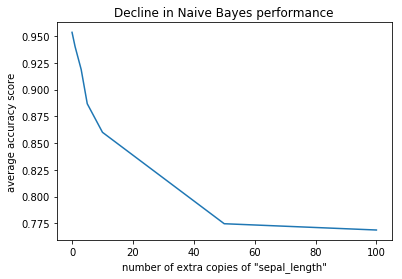

In [95]:
X = data[data.columns[:-1]]
y = data.species

n_copies = [0, 1, 3, 5, 10, 50, 100]


def create_copies_sepal_length(X, n):
    X_new = X.copy()
    for i in range(n):
        X_new['sepal_length_copy%s' % i] = X['sepal_length']
    return X_new


def get_cross_val_score(n):
    X_new = create_copies_sepal_length(X, n)
    scores = cross_val_score(GaussianNB(), X_new, y, cv=cv_N, n_jobs=cv_N)
    return np.mean(scores)


avg_scores = pd.Series(
    [get_cross_val_score(n) for n in n_copies],
    index=n_copies)

ax = avg_scores.plot()
ax.set(
    xlabel='number of extra copies of "sepal_length"',
    ylabel='average accuracy score',
    title='Decline in Naive Bayes performance');


## Question 6 - Naive Bayes on Human Activity Recongnition

In this question, we'll explore discretizing the dataset and then fitting MultinomialNB.  

* Load the Human Activity Recognition dataset. 
* Look at the data types. It's all continuous except for the target.
* Create `X` and `y` from `data`. `y` is the "Activity" column.
* Create training and test splits.
* Fit a GaussianNB to the training split.
* Get predictions on the test set.
* use `sns.heatmap` to plot the confusion matrix for predictions.

In [120]:
data_activity = pd.read_csv(os.path.join('data', 'Human_Activity_Recognition_Using_Smartphones_Data.csv'))
data_activity[:3]

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING


In [121]:
data_activity.dtypes[data_activity.dtypes != 'float64']

Activity    object
dtype: object

In [122]:
X_cols = [col for col in data_activity.columns if col != 'Activity']

In [123]:
data_activity.shape[1]

562

In [124]:
len(X_cols)

561

In [125]:
X = data_activity[X_cols]
y = data_activity.Activity

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [126]:
GaussNB = GaussianNB()
GaussNB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [127]:
labels = y.unique()
labels

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

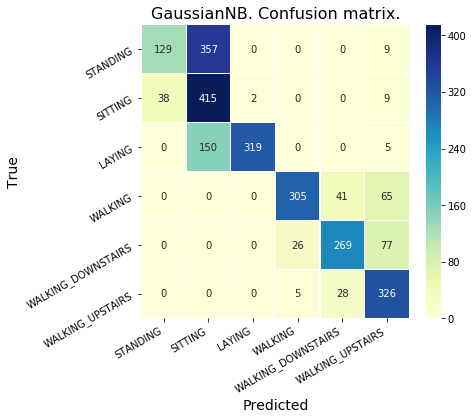

In [128]:
y_test_pred = GaussNB.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred, labels)
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
sns.heatmap(cm, ax=ax, annot=True, fmt='d', cmap="YlGnBu",linewidths=.2)
ax.set_xlabel('Predicted', fontsize=14)
ax.set_ylabel('True', fontsize=14)
ax.set_xticklabels([''] + labels)
fig.autofmt_xdate()
ax.set_yticklabels([''] + labels)
plt.yticks(rotation=30)
plt.title('GaussianNB. Confusion matrix.', fontsize=16)
plt.show()

In [129]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

                    precision    recall  f1-score   support

            LAYING       0.99      0.67      0.80       474
           SITTING       0.45      0.89      0.60       464
          STANDING       0.77      0.26      0.39       495
           WALKING       0.91      0.74      0.82       411
WALKING_DOWNSTAIRS       0.80      0.72      0.76       372
  WALKING_UPSTAIRS       0.66      0.91      0.77       359

         micro avg       0.68      0.68      0.68      2575
         macro avg       0.76      0.70      0.69      2575
      weighted avg       0.76      0.68      0.68      2575



## Question 7

Now, let's discretize the dataset from Question 6. There are many ways to do this, but we'll use `pd.DataFrame.rank(pct=True)`.

a. Create `X_discrete` from `X` using .rank(pct=True)

b. Look at the values. They are still not discrete. Modify `X_discrete` so that it is indeed discrete. (Hint: try to get the first 2 digits using `.applymap`)

c. Split `X_discrete` and `y` into training and test datasets

d. Fit a MultinomialNB to the training split.

e. Get predictions on the test set.

f. Plot the confusion matrix for predictions.

In [130]:
X_quantiles = X.rank(pct=True)
X_quantiles.describe().iloc[:,:5]

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.500049,0.500049,0.500049,0.500049,0.500049
std,0.288689,0.288689,0.288689,0.288689,0.288689
min,0.000097,0.000097,0.000097,0.000097,0.000097
25%,0.250073,0.250073,0.250073,0.250073,0.250073
50%,0.500049,0.500049,0.500049,0.500049,0.500049
75%,0.750024,0.750024,0.750024,0.750024,0.750024
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [131]:
from functools import partial
X_discrete = X_quantiles.applymap(partial(round, ndigits=2))

In [132]:
X_di_train, X_di_test, y_train, y_test = train_test_split(X_discrete, y)

In [133]:
MultinNB = MultinomialNB()
MultinNB.fit(X_di_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

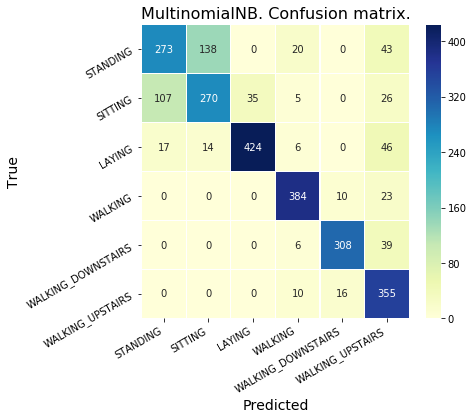

In [134]:
labels = y.unique()
y_test_pred = MultinNB.predict(X_di_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred, labels)
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
sns.heatmap(cm, ax=ax, annot=True, fmt='d', cmap="YlGnBu",linewidths=.2)
ax.set_xlabel('Predicted', fontsize=14)
ax.set_ylabel('True', fontsize=14)
ax.set_xticklabels([''] + labels)
fig.autofmt_xdate()
ax.set_yticklabels([''] + labels)
plt.yticks(rotation=30)
plt.title('MultinomialNB. Confusion matrix.', fontsize=16)
plt.show()

In [135]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

                    precision    recall  f1-score   support

            LAYING       0.92      0.84      0.88       507
           SITTING       0.64      0.61      0.62       443
          STANDING       0.69      0.58      0.63       474
           WALKING       0.89      0.92      0.91       417
WALKING_DOWNSTAIRS       0.92      0.87      0.90       353
  WALKING_UPSTAIRS       0.67      0.93      0.78       381

         micro avg       0.78      0.78      0.78      2575
         macro avg       0.79      0.79      0.78      2575
      weighted avg       0.79      0.78      0.78      2575

